Intercept    -0.307294
deltaP90     14.254037
deltaP180   -25.938119
deltaP360    13.255519
dtype: float64
      Actual  Predicted
0  -0.318741  -0.043637
1   0.312132  -0.353811
2   0.577353  -0.516326
3  -0.104461  -0.667159
4  -0.939826  -0.329843
5   0.016460  -0.228056
6   0.262533  -0.527435
7  -2.793622  -0.156735
8   0.803291  -0.462482
9  -0.151584  -0.401400
10 -0.144436  -0.574085
11  1.211350  -0.172807
12  0.012719  -0.502263
13 -0.006810  -0.374041
14 -0.003260  -1.174560
15 -0.007035  -0.605561
16  0.236323  -0.337810
17  0.219962  -0.592682
18  1.665857   0.126610
19 -0.153841  -0.319846
20 -0.005960  -0.257028
21  0.209550  -0.314738
22  0.068937  -0.095589
23 -0.005280  -0.237391
24 -0.003870  -0.226679
25  0.312880  -0.317048
26 -0.876560  -0.336757
27 -0.975602  -0.442528
28 -0.007570  -0.554208
29 -0.000990  -0.084236
30 -2.024643  -0.530377
31  0.010860  -0.368950
32 -0.171181  -0.082364
33 -0.062330  -0.253781
34 -2.408972  -0.308222
35  0.041930  -0.802549
36  0

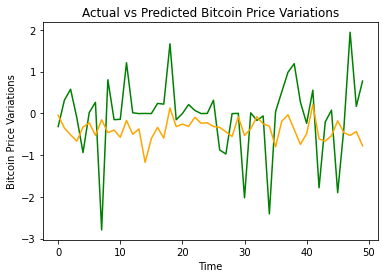

The MSE is 0.9531988371215904


In [1]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import math


# Reading the data vectors form  dataset
train1_90 = pd.read_csv('train1_90.csv')
train1_180 = pd.read_csv('train1_180.csv')
train1_360 = pd.read_csv('train1_360.csv')

train2_90 = pd.read_csv('train2_90.csv')
train2_180 = pd.read_csv('train2_180.csv')
train2_360 = pd.read_csv('train2_360.csv')

test_90 = pd.read_csv('test_90.csv')
test_180 = pd.read_csv('test_180.csv')
test_360 = pd.read_csv('test_360.csv')


def computeDelta(wt, X, Xi):
    """
    Computing Bayesian Regression with the euclidean distance 
    replaced by the similarity measure
    
    Parameters -
    wt : constant
    X : A row of Panda Dataframe (x, y) 
    Xi : Panda Dataframe (xi, yi)
    Returns - The output of Bayesian Regression a prediction of the average price change.
    """
    a=0
    for i in range(len(Xi)):
        leng = len(Xi.iloc[i])
        leng-=1

        tempx = X[:-1]
        tempxi = Xi.loc[i][:-1]
        xm = np.mean(tempx)
        xs= np.std(tempx)
        Xim = np.mean(tempxi)
        Xis = np.std(tempxi)
        s = 0
        for j in range(len(tempx)):
            s= s+ (tempx[j]-xm)*(tempxi[j]-Xim)
        s = s/(len(tempx)*xs*Xis)              #similarity value
        
        a = a + (Xi.iloc[i][leng]*math.exp(wt * s))
    b=0
    for i in range(len(Xi)):
        leng = len(Xi.iloc[i])
        leng-=1
        
        tempx = X[:-1]
        tempxi = Xi.loc[i][:-1]
        xm = np.mean(tempx)
        xs= np.std(tempx)
        Xim = np.mean(tempxi)
        Xis = np.std(tempxi)
        s = 0
        for j in range(len(tempx)):
            s= s+ (tempx[j]-xm)*(tempxi[j]-Xim)
        s = s/(len(tempx)*xs*Xis)           #similarity value
        
        b = b+ (math.exp(wt * s))
    return a/b    #gives the predicted value of price variation
    pass



# Performing Bayesian Regression to find the predicted value of average price change for each dataset of train2 using train1 as input. 

weight = 2  # A constant
trainDeltaP90 = np.empty(0)
trainDeltaP180 = np.empty(0)
trainDeltaP360 = np.empty(0)
for i in range(0,len(train1_90.index)) :
  trainDeltaP90 = np.append(trainDeltaP90, computeDelta(weight,train2_90.iloc[i],train1_90))
for i in range(0,len(train1_180.index)) :
  trainDeltaP180 = np.append(trainDeltaP180, computeDelta(weight,train2_180.iloc[i],train1_180))
for i in range(0,len(train1_360.index)) :
  trainDeltaP360 = np.append(trainDeltaP360, computeDelta(weight,train2_360.iloc[i],train1_360))


# Actual deltaP values for the train2 data.
trainDeltaP = np.asarray(train2_360[['Yi']])
trainDeltaP = np.reshape(trainDeltaP, -1)


# Combining all the training data
d = {'deltaP': trainDeltaP,
     'deltaP90': trainDeltaP90,
     'deltaP180': trainDeltaP180,
     'deltaP360': trainDeltaP360 }
trainData = pd.DataFrame(d)


# Using the statsmodels ols function to train the linear model

model = smf.ols('deltaP ~ deltaP90 + deltaP180 + deltaP360', trainData) 
model = model.fit()

# Print the weights from the model
print (model.params)


# Performing Bayesian Regression to predict the average price change for each dataset of test using train1 as input

weight=2
testDeltaP90 = np.empty(0)
testDeltaP180 = np.empty(0)
testDeltaP360 = np.empty(0)
for i in range(0,len(train1_90.index)) :
    testDeltaP90 = np.append(testDeltaP90, computeDelta(weight,test_90.iloc[i],train1_90))
for i in range(0,len(train1_180.index)) :
    testDeltaP180 = np.append(testDeltaP180, computeDelta(weight,test_180.iloc[i],train1_180))
for i in range(0,len(train1_360.index)) :
    testDeltaP360 = np.append(testDeltaP360, computeDelta(weight,test_360.iloc[i],train1_360))

# Actual deltaP values for test data.

testDeltaP = np.asarray(test_360[['Yi']])
testDeltaP = np.reshape(testDeltaP, -1)

# Combining all the test data
d = {'deltaP': testDeltaP,
     'deltaP90': testDeltaP90,
     'deltaP180': testDeltaP180,
     'deltaP360': testDeltaP360}
testData = pd.DataFrame(d)


# Predicting price variation on the test data set using smf model computed before
result = model.predict(testData)
compare = { 'Actual': testDeltaP,
            'Predicted': result }
compareDF = pd.DataFrame(compare)

x_axis = range(0, 50)
print(compareDF)       #actual vs predicted values of price change

#Plotting the graph showing difference between actual and predicted price variations
plt.plot(x_axis, testDeltaP, color='g')
plt.plot(x_axis, result, color='orange')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price Variations')
plt.title('Actual vs Predicted Bitcoin Price Variations')
plt.show()


# Computing the Mean squred error using pre-defined function

MSE = 0.0
MSE = sm.mean_squared_error(testDeltaP, result)
print ("The MSE is " +str(MSE))      #printing the mse

